<a href="https://colab.research.google.com/github/sweetyjunnarkar/Facebook-comment_volume-prediction/blob/main/Sweety_Junnarkar_Team_5_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Project Title : Facebook Comment Volume Dataset Data Set</b>

---



## **Data Set Information:**

---
### The dataset contains 5 variants of the dataset, for the details about the variants and detailed analysis read and cite the research paper.
###Research Paper Link :
### https://www.researchgate.net/publication/301284606_Facebook_comment_volume_prediction


## **Problem Annalysis**

---
###For our experiment, we crawled Facebook pages to collect the data for training and testing of our proposedmodel. In total 2,770 pages are crawled for 57,000 posts and 4,120,532 comments using JAVA and Facebook QueryLanguage (FQL). The crawled data adds up to certain GB'sand this process of crawling had taken certain weeks. Aftercrawling, the crawled data is cleaned(After cleansing 5,892 posts are omitted and we left with 51,108 posts).We divided the cleaned corpus into two subsets usingtemporal split.(1) Training data(80%, 40988) and (2)Testing data(20%, 10120) and then these datasets are sent topreprocessor modules for preprocessing where:
1. **Training Dataset:** The training dataset goes through a
parallel process of variant calculations and vectorization and
as a result of training set pre-processing, we are obtained
with these five training sets as: 
<br>

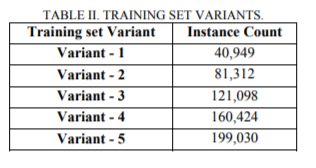
<br>

2. **Testing Dataset:** Out of 10,120 testing data items,
1000 test posts are selected at random and 10 test cases are
developed are described earlier2) Testing Dataset: Out of 10,120 testing data items,
1000 test posts are selected at random and 10 test cases are
developed are described earlier.

## **Attribute Information:**

---
<br>


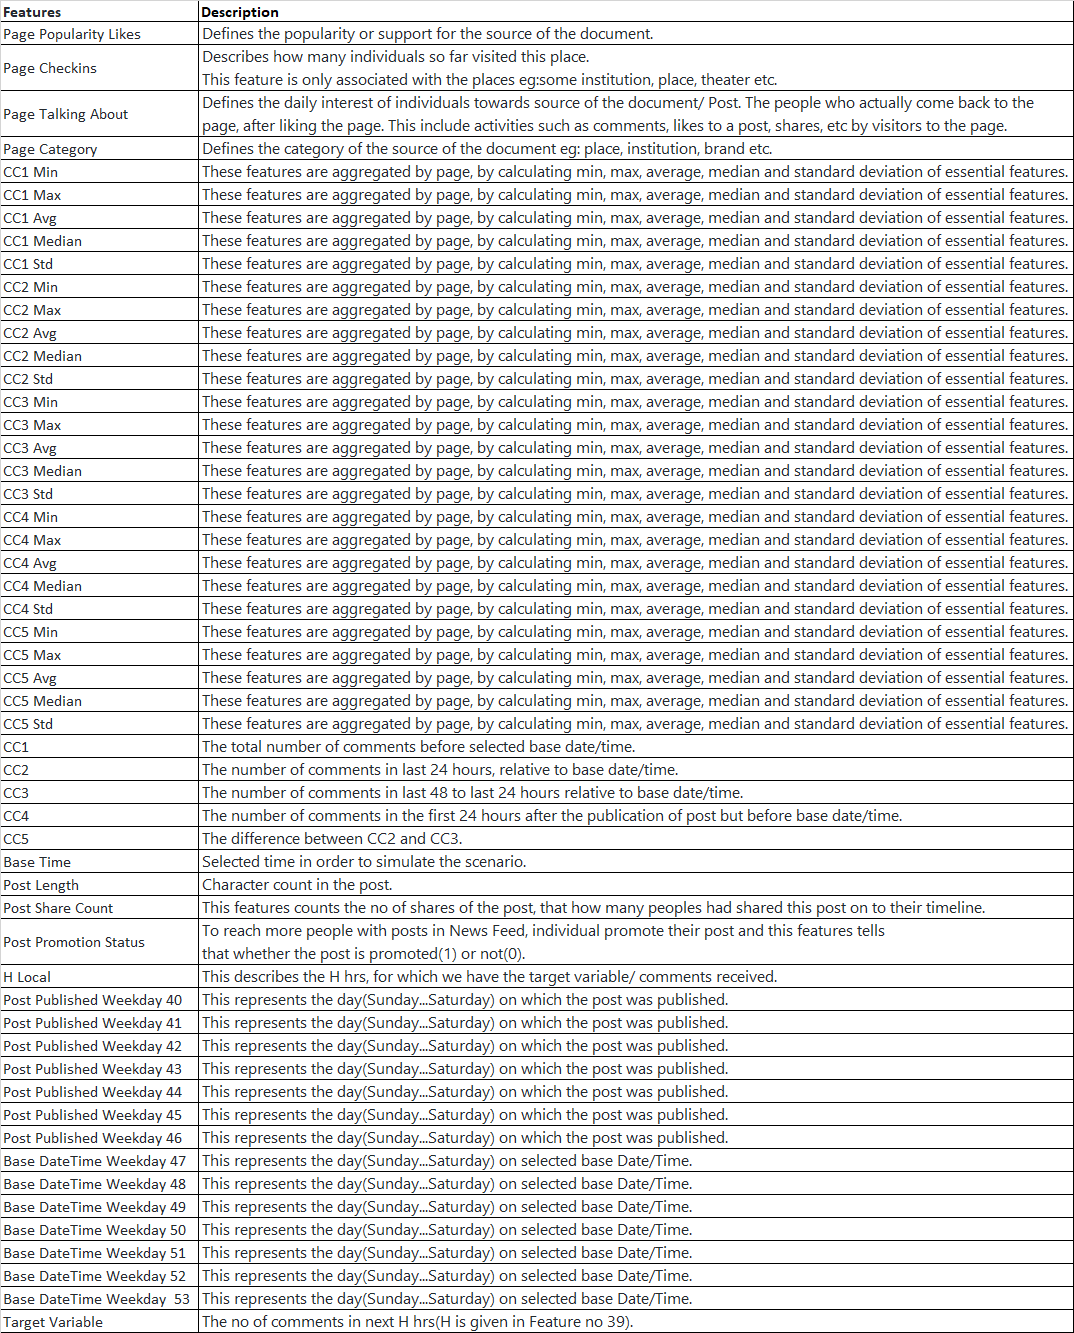

## **Importing Important libraray and connecting Drive**

In [ ]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Reading Training and Test Data**

In [ ]:
columns=['Likes','Checkins','Returns','Category','CC1_min','CC1_max','CC1_avg','CC1_med','CC1_sd','CC2_min','CC2_max','CC2_avg','CC2_med','CC2_sd','CC3_min','CC3_max','CC3_avg','CC3_med','CC3_sd','CC4_min','CC4_max','CC4_avg','CC4_med','CC4_sd','CC5_min','CC5_max','CC5_avg','CC5_med','CC5_sd','CC1','CC2','CC3','CC4','CC5','base_time','post_length','post_share_count','post_promotion_status','H_local','sun_post_day','mon_post_day','tue_post_day','wed_post_day','thu_post_day','fri_post_day','sat_post_day','sun_base_day','mon_base_day','tue_base_day','wed_base_day','thu_base_day','fri_base_day','sat_base_day','output']
test_files = ['Test_Case_1.csv', 'Test_Case_2.csv']
test_file_location = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/data/dat/test/'

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/data/dat/train/Features_Variant_1.csv', header=None)

In [ ]:
df_test = pd.concat([pd.read_csv(test_file_location + csv_file_test, header=None) for csv_file_test in test_files])

In [ ]:
dataset=pd.concat([df_train,df_test])
dataset.columns=columns

In [ ]:
#First Look
dataset.head(2)

,Likes,Checkins,Returns,Category,CC1_min,CC1_max,CC1_avg,CC1_med,CC1_sd,CC2_min,CC2_max,CC2_avg,CC2_med,CC2_sd,CC3_min,CC3_max,CC3_avg,CC3_med,CC3_sd,CC4_min,CC4_max,CC4_avg,CC4_med,CC4_sd,CC5_min,CC5_max,CC5_avg,CC5_med,CC5_sd,CC1,CC2,CC3,CC4,CC5,base_time,post_length,post_share_count,post_promotion_status,H_local,sun_post_day,mon_post_day,tue_post_day,wed_post_day,thu_post_day,fri_post_day,sat_post_day,sun_base_day,mon_base_day,tue_base_day,wed_base_day,thu_base_day,fri_base_day,sat_base_day,output
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,65,166,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,10,132,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
dataset.describe()

,Likes,Checkins,Returns,Category,CC1_min,CC1_max,CC1_avg,CC1_med,CC1_sd,CC2_min,CC2_max,CC2_avg,CC2_med,CC2_sd,CC3_min,CC3_max,CC3_avg,CC3_med,CC3_sd,CC4_min,CC4_max,CC4_avg,CC4_med,CC4_sd,CC5_min,CC5_max,CC5_avg,CC5_med,CC5_sd,CC1,CC2,CC3,CC4,CC5,base_time,post_length,post_share_count,post_promotion_status,H_local,sun_post_day,mon_post_day,tue_post_day,wed_post_day,thu_post_day,fri_post_day,sat_post_day,sun_base_day,mon_base_day,tue_base_day,wed_base_day,thu_base_day,fri_base_day,sat_base_day,output
count,4.114900e+04,41149.000000,4.114900e+04,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.0,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000,41149.000000
mean,1.330369e+06,4677.492163,4.631141e+04,24.236482,1.629833,444.712241,55.954790,35.765377,67.769170,0.235364,286.662641,22.414120,7.654986,40.769006,0.025347,268.502224,19.680756,4.909184,38.809613,1.540451,416.757175,52.863527,34.161839,63.453864,-220.071423,276.860677,2.733363,-1.873107,56.169210,56.054193,22.464118,19.727454,52.958274,2.736664,35.236506,163.709300,117.309777,0.0,23.718827,0.122700,0.143138,0.149019,0.156723,0.144572,0.146784,0.137063,0.142458,0.132980,0.136966,0.147877,0.150648,0.143916,0.145155,7.421760
std,6.818645e+06,20607.481062,1.227042e+05,19.945773,21.055385,499.141585,87.772227,70.496128,82.276262,10.128022,377.393789,37.860108,22.706436,55.031239,1.995709,328.092312,31.332800,13.259591,51.249632,19.056051,474.703343,82.101373,66.683799,77.071828,282.604760,376.262352,18.559900,15.884149,74.753516,138.755381,78.597688,71.909664,129.929839,95.579482,20.932872,376.657344,943.133918,0.0,2.136178,0.328097,0.350218,0.356112,0.363544,0.351673,0.353894,0.343918,0.349523,0.339557,0.343815,0.354983,0.357709,0.351009,0.352262,35.929936
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2119.000000,-204.000000,-210.500000,-288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1366.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.714900e+04,0.000000,7.010000e+02,9.000000,0.000000,45.000000,5.527273,2.000000,8.278756,0.000000,26.000000,1.911290,0.000000,4.109465,0.000000,26.000000,2.030303,0.000000,4.094580,0.000000,42.000000,5.218182,2.000000,7.600215,-310.000000,23.000000,-0.483221,-2.000000,6.078892,2.000000,0.000000,0.000000,2.000000,-6.000000,17.000000,38.000000,2.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.977020e+05,0.000000,7.237000e+03,18.000000,0.000000,241.000000,23.374101,12.000000,35.853805,0.000000,118.000000,8.437500,2.000000,17.507979,0.000000,116.000000,8.584270,1.000000,18.639984,0.000000,224.000000,21.859375,12.000000,32.368848,-92.000000,109.000000,0.273810,0.000000,25.547172,11.000000,2.000000,0.000000,11.000000,0.000000,35.000000,97.000000,13.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.141100e+04,32.000000,0.000000,717.000000,71.828829,42.000000,102.554954,0.000000,405.000000,29.005525,8.000000,61.379848,0.000000,381.000000,24.842520

## **Removing dublicate record from our Dataset**

In [ ]:
# duplicate observation check
len(dataset[dataset.duplicated()])

8

In [ ]:
# removing duplicate observations
dataset=dataset.drop_duplicates()

In [ ]:
dataset['Category'].value_counts()

9     7548
24    4520
18    4306
36    2390
16    1896
      ... 
78       1
37       1
93       1
41       1
70       1
Name: Category, Length: 88, dtype: int64

In [ ]:
dataset['Checkins'].value_counts()

0        25599
1         1341
148        489
11         459
4          390
         ...  
45           1
69           1
938          1
59780        1
373          1
Name: Checkins, Length: 184, dtype: int64

In [ ]:
dataset['post_promotion_status'].value_counts()

0    41141
Name: post_promotion_status, dtype: int64

1. As we can see we have too much unique value for Categoryand checkins feature So, it's better to drop these features from our dataset.
2. We can also drop post_promotion_status this feature becuase we have only one unique value.

In [ ]:
drop_columns = ['Category','Checkins','post_promotion_status']

In [ ]:
day_cols=['sun_post_day','mon_post_day','tue_post_day','wed_post_day','thu_post_day','fri_post_day','sat_post_day','sun_base_day','mon_base_day','tue_base_day','wed_base_day','thu_base_day','fri_base_day','sat_base_day']
dataset[day_cols] = dataset[day_cols].astype('category')

In [ ]:
drop_columns1= ['CC3','CC3_min','CC3_max','CC3_avg','CC3_med','CC3_sd']

In [ ]:
drop_columns.append('sat_post_day')
drop_columns.append('sat_base_day')

## **Droping Unnecceesary Features from our Dataset.**

In [ ]:
dataset = dataset.drop(drop_columns,axis=1)
dataset = dataset.drop(drop_columns1,axis=1)

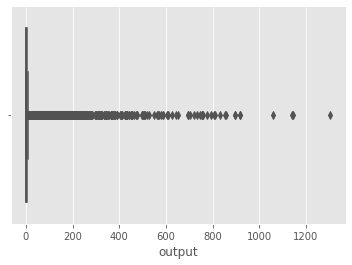

In [ ]:
# Boxplot for Output Variable
sns.boxplot(x='output',data=dataset)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


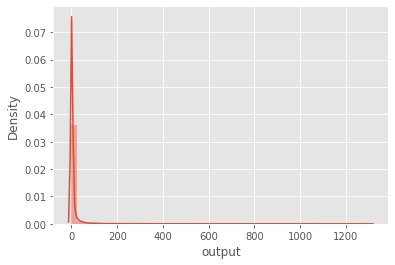

In [ ]:
# distplot for Output Variable
sns.distplot(dataset['output'])

In [ ]:
dataset.head(2)

,Likes,Returns,CC1_min,CC1_max,CC1_avg,CC1_med,CC1_sd,CC2_min,CC2_max,CC2_avg,CC2_med,CC2_sd,CC4_min,CC4_max,CC4_avg,CC4_med,CC4_sd,CC5_min,CC5_max,CC5_avg,CC5_med,CC5_sd,CC1,CC2,CC4,CC5,base_time,post_length,post_share_count,H_local,sun_post_day,mon_post_day,tue_post_day,wed_post_day,thu_post_day,fri_post_day,sun_base_day,mon_base_day,tue_base_day,wed_base_day,thu_base_day,fri_base_day,output
0,634995,463,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,65,166,2,24,0,0,0,1,0,0,0,0,0,0,0,0,0
1,634995,463,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,10,132,1,24,0,0,0,0,1,0,0,0,0,0,0,1,0


### **HeatMap for Our Dataset**

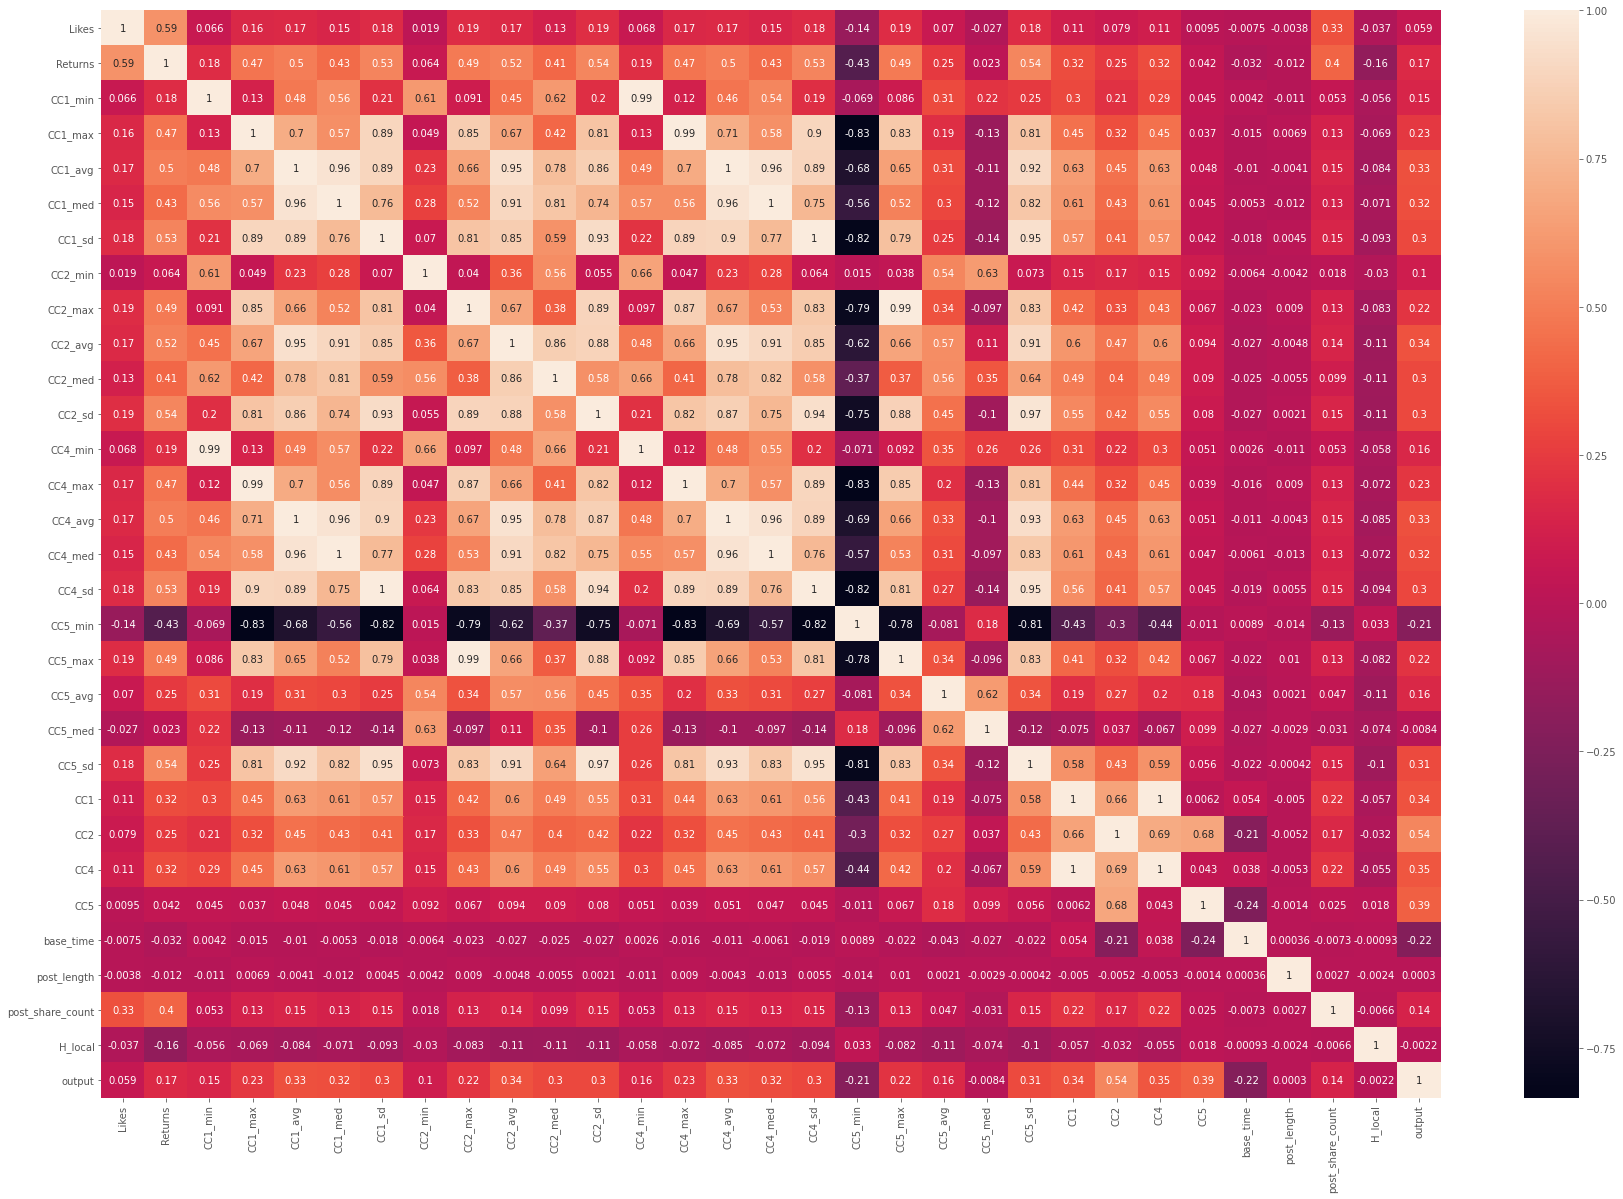

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(dataset.corr(),annot=True)

###As We can see for our dataframe some of the independent variable is heighly cor-related.But we can not drop any features because all the features have generated by featue Engineering.

## **Let's make train and test Data for Machine Learning Modeling...**

In [ ]:
dependent_variable = 'output'
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

### **Train Data**

In [ ]:
# Create train data 
X=dataset.iloc[:40941]
# Create train data of independent variables
X_train = X[independent_variables].values
# Create train data of dependent variable 
y_train = X[dependent_variable].values

### **Test Data**

In [ ]:
# Create test data 
X1=dataset.iloc[-200:]
# Create test data of independent variables
X_test = X1[independent_variables].values
# Create test data of dependent variable 
y_test = X1[dependent_variable].values

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40941, 42), (200, 42), (40941,), (200,))

## **Preprocessing the Data With StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_train[0]

array([ 1.41891719, -0.51106051, -0.51660301, -0.41060384,  0.53368517,
        0.13867335,  0.00619484, -0.41782221, -0.40618108, -0.41370066,
       -0.28769329,  0.73020968, -0.02695079,  2.3128793 , -0.37332358,
       -0.39082996,  0.12094448, -0.40903323,  1.39116798, -0.42148539,
       -0.34453869, -0.10001394, -0.49948876, -0.39963188, -0.39950544,
        0.82694318, -0.02182885, -0.40988722,  0.0929836 ,  0.03720576,
       -0.08000442, -0.07643742,  0.18984609, -0.49522195,  1.42152846,
       -0.12196473, -0.41967553, -0.41017171, -0.39565155,  0.13726412,
        0.53598089, -0.40678449])

# **Applying All the Machine Learning Models to choose best One**

---



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,median_absolute_error,mean_squared_error

In [ ]:
#declare the models
linear_reg = LinearRegression()
lasso = Lasso(alpha=0.01,random_state=42,tol=0.01)
ridge = Ridge( alpha=1.0, solver='cholesky',random_state=42)
dt_model=DecisionTreeRegressor(max_depth=10,max_leaf_nodes=11,min_samples_leaf=9, min_samples_split=7,random_state = 42)
rf_model=RandomForestRegressor(max_depth=10,max_leaf_nodes=11,min_samples_leaf=9, min_samples_split=7,random_state = 42)
gbc_model=GradientBoostingRegressor(max_depth=10,max_leaf_nodes=11,min_samples_leaf=9, min_samples_split=7)
xgboost = XGBRegressor(n_estimators=50,objective='reg:squarederror',max_depth=10,max_leaf_nodes=11,min_samples_leaf=9,reg_alpha=4,learning_rate=.050 ,min_samples_split=7,random_state = 42)
knn = KNeighborsRegressor(n_neighbors=10,metric='minkowski')

#create a list of models
models=[linear_reg,lasso,ridge,dt_model,rf_model,gbc_model,xgboost,knn]

lst_imp=[]
# fuction for calculation the eveluation matrix
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    n1=len(X_train)+len(X_test)
    n2=len(y_train)+len(y_test)
    n3=len(dataset.columns)-1
    #read model one by one
    for model in models:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        y_pred_train=model.predict(X_train)
        
        #compute metrics

        train_MSE=mean_squared_error(y_train, y_pred_train)
        MSE=mean_squared_error(y_test,y_pred)
        train_RMSE=np.sqrt(train_MSE)
        RMSE=np.sqrt(MSE)
        train_MAE=mean_absolute_error(y_train,y_pred_train)
        MAE=mean_absolute_error(y_test,y_pred)
        r2_score_train=r2_score(y_train,y_pred_train)
        r2_score_test=r2_score(y_test,y_pred)
        train_adjusted_R2=1-((1-r2_score_train)*(n2-1)/(n2-n3-1))
        test_adjusted_R2=1-((1-r2_score_test)*(n2-1)/(n2-n3-1))
        
        #insert in dataframe
        df.loc[i,"Model Name"]=model.__class__.__name__
        df.loc[i,"Train MSE"]=round(train_MSE,2)
        df.loc[i,"Test MSE"]=round(MSE,2)
        df.loc[i,"Train RMSE"]=round(train_RMSE,2)
        df.loc[i,"Test RMSE"]=round(RMSE,2)
        df.loc[i,"Train MAE"]=round(train_MAE,2)
        df.loc[i,"Test MAE"]=round(MAE,2)
        df.loc[i,"Train R2 Score"]=round(r2_score_train,2)
        df.loc[i,"Test R2 Score"]=round(r2_score_test,2)
        df.loc[i,'Train Adjusted R2'] = round(train_adjusted_R2,2)
        df.loc[i,'Test Adjusted R2'] = round(test_adjusted_R2,2)


        i+=1
    # Return the data frame and dictionary
    return df

In [ ]:
result_df=score_model(X_train,y_train,X_test,y_test)

In [ ]:
result_df

,Model Name,Train MSE,Test MSE,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R2 Score,Test R2 Score,Train Adjusted R2,Test Adjusted R2
0,LinearRegression,850.86,3190.35,29.17,56.48,8.29,22.85,0.32,0.56,0.32,0.56
1,Lasso,852.55,3134.84,29.20,55.99,8.24,22.50,0.32,0.57,0.32,0.57
2,Ridge,850.93,3196.73,29.17,56.54,8.29,22.85,0.32,0.56,0.32,0.56
3,DecisionTreeRegressor,536.09,2806.87,23.15,52.98,5.93,20.74,0.57,0.61,0.57,0.61
4,RandomForestRegressor,468.10,2638.74,21.64,51.37,5.38,19.67,0.63,0.64,0.63,0.64
5,GradientBoostingRegressor,199.87,2288.09,14.14,47.83,3.45,20.02,0.84,0.68,0.84,0.68
6,XGBRegressor,60.48,2104.39,7.78,45.87,2.10,16.54,0.95,0.71,0.95,0.71
7,KNeighborsRegressor,687.80,4436.25,26.23,66.61,5.24,23.40,0.45,0.39,0.45,0.39


In [ ]:
result_df.groupby(['Model Name'])[['Train R2 Score','Test R2 Score']].sum()

,Train R2 Score,Test R2 Score
Model Name,,
DecisionTreeRegressor,0.57,0.61
GradientBoostingRegressor,0.84,0.68
KNeighborsRegressor,0.45,0.39
Lasso,0.32,0.57
LinearRegression,0.32,0.56
RandomForestRegressor,0.63,0.64
Ridge,0.32,0.56
XGBRegressor,0.95,0.71


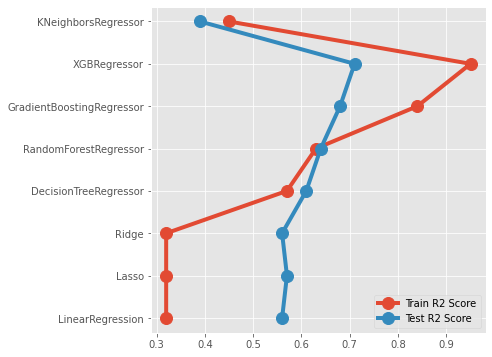

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(result_df['Train R2 Score'],result_df['Model Name'],marker='o', linewidth=4, markersize=12,label='Train R2 Score')
plt.plot(result_df['Test R2 Score'],result_df['Model Name'],marker='o', linewidth=4, markersize=12,label='Test R2 Score')
plt.legend(loc='lower right')

###From above it's clear that models XGBRegressor,RandomForestRegressor,GradientBoostingRegressor is having a good r2_score for test and train dataset so we can include this all for our oprimal model and we can apply some hypertuning parameter.

# **Function to predict on the Test and Train and evaluate the metrics**

In [ ]:
def Model_performance(model,X_train,X_test, y_train,y_test):
        
        n1=len(X_train)+len(X_test)
        n2=len(y_train)+len(y_test)
        n3=len(dataset.columns)-1
        
        #Train
        model.fit(X_train,y_train)
        y_pred_train =model.predict(X_train)
        y_pred = model.predict(X_test)
        #Evaluation metrics
        train_MSE=mean_squared_error(y_train, y_pred_train)
        MSE=mean_squared_error(y_test,y_pred)
        train_RMSE=np.sqrt(train_MSE)
        RMSE=np.sqrt(MSE)
        train_MAE=mean_absolute_error(y_train,y_pred_train)
        MAE=mean_absolute_error(y_test,y_pred)
        r2_score_train=r2_score(y_train,y_pred_train)
        r2_score_test=r2_score(y_test,y_pred)
        train_adjusted_R2=1-((1-r2_score_train)*(n2-1)/(n2-n3-1))
        test_adjusted_R2=1-((1-r2_score_test)*(n2-1)/(n2-n3-1))

        evaluation={'Train R2_score':r2_score_train,'Test R2_score':r2_score_test,'Adjusted R2_score Train':train_adjusted_R2,
                     'Adjusted R2_score Test':test_adjusted_R2,'Train MSE':train_MSE,"Test MSE":MSE,'Train RMSE':train_RMSE,
                     'Test RMSE':RMSE,'Train MAE':train_MAE,'Test MAE':MAE}
        return evaluation,model.__class__.__name__

## **RandomForestRegressor**

In [ ]:
rndm_fst=RandomForestRegressor(
                      max_depth=10,
                      max_leaf_nodes=11,
                      min_samples_leaf=9,
                      min_samples_split=7,
                      random_state = 42,
                      n_estimators=60,
                      min_impurity_decrease=0.01,
                      oob_score=True)

In [ ]:
evel_metrics,model_name=Model_performance(rndm_fst,X_train,X_test, y_train,y_test)

In [ ]:
evel_metrics

{'Adjusted R2_score Test': 0.6342657355186877,
 'Adjusted R2_score Train': 0.6267364414249705,
 'Test MAE': 19.451310755550935,
 'Test MSE': 2647.413292527731,
 'Test R2_score': 0.6346391151761552,
 'Test RMSE': 51.45302024689834,
 'Train MAE': 5.398942145895255,
 'Train MSE': 469.8577071116192,
 'Train R2_score': 0.6271175077706233,
 'Train RMSE': 21.676201399498463}

In [ ]:
evel_metrics_df=pd.DataFrame.from_dict(evel_metrics, orient='index',columns=[model_name])
evel_metrics_df

,RandomForestRegressor
Train R2_score,0.627118
Test R2_score,0.634639
Adjusted R2_score Train,0.626736
Adjusted R2_score Test,0.634266
Train MSE,469.857707
Test MSE,2647.413293
Train RMSE,21.676201
Test RMSE,51.453020
Train MAE,5.398942
Test MAE,19.451311


### **Feature Importances Graph**

In [ ]:
features = X[independent_variables].columns
importances = rndm_fst.feature_importances_
indices = np.argsort(importances)

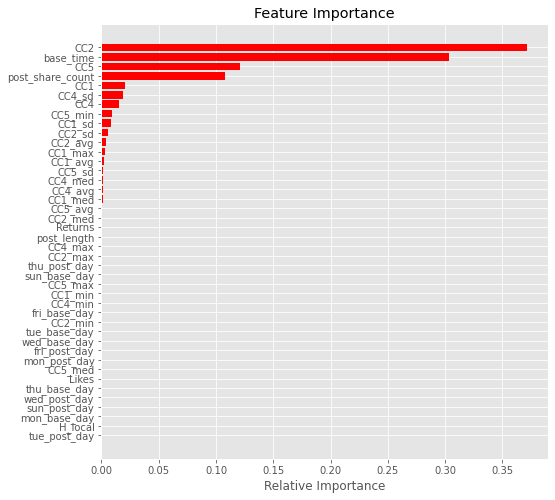

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### CC2 and base time is more important features for RandomForestRegression and we have acheive 0.63 test score for Random Forest.

## **GradientBoostingRegressor**

In [ ]:
grdt_bfr_fst=GradientBoostingRegressor(
                      learning_rate=0.1,
                      max_depth=10,
                      max_leaf_nodes=11,
                      min_samples_leaf=9,
                      min_samples_split=7,
                      random_state = 42,
                      n_estimators=60,
                      min_impurity_decrease=0.01)

In [ ]:
evel_metrics1,model_name1=Model_performance(grdt_bfr_fst,X_train,X_test, y_train,y_test)

In [ ]:
evel_metrics1

{'Adjusted R2_score Test': 0.6768222498025418,
 'Adjusted R2_score Train': 0.8091370844199105,
 'Test MAE': 20.324052570629004,
 'Test MSE': 2339.3626324166144,
 'Test R2_score': 0.6771521833345859,
 'Test RMSE': 48.36695806453631,
 'Train MAE': 3.7156132755064677,
 'Train MSE': 240.25493468865704,
 'Train R2_score': 0.8093319371776734,
 'Train RMSE': 15.500159182687675}

In [ ]:
evel_metrics_df1=pd.DataFrame.from_dict(evel_metrics1, orient='index',columns=[model_name1])
evel_metrics_df1

,GradientBoostingRegressor
Train R2_score,0.809332
Test R2_score,0.677152
Adjusted R2_score Train,0.809137
Adjusted R2_score Test,0.676822
Train MSE,240.254935
Test MSE,2339.362632
Train RMSE,15.500159
Test RMSE,48.366958
Train MAE,3.715613
Test MAE,20.324053


### **Feature Importances Graph**

In [ ]:
features = X[independent_variables].columns
importances = grdt_bfr_fst.feature_importances_
indices = np.argsort(importances)

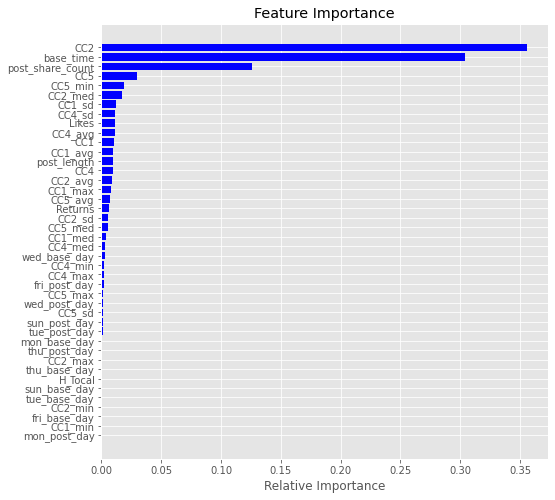

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###Most Important features is Base time and CC2 features and we have acheieved test score 0.68.

## **XGBoost**

In [ ]:
xb_boost = XGBRegressor(max_depth=7,
                    learning_rate=.055,
                    min_child_weight = 3,
                    max_leaf_nodes= 15,
                    min_samples_leaf=6, 
                    reg_alpha=5,
                    min_samples_split=1,
                    n_jobs=-1,
                    colsample_bytree = 0.5,
                    random_state = 45,
                    n_estimators=60,
                    objective='reg:squarederror')

In [ ]:
evel_metrics2,model_name2=Model_performance(xb_boost,X_train,X_test, y_train,y_test)

In [ ]:
evel_metrics2

{'Adjusted R2_score Test': 0.7309500807642537,
 'Adjusted R2_score Train': 0.879481683087209,
 'Test MAE': 18.750406002998353,
 'Test MSE': 1947.5515468817182,
 'Test R2_score': 0.7312247549647375,
 'Test RMSE': 44.131072351368466,
 'Train MAE': 3.1076965156286285,
 'Train MSE': 151.70637140623253,
 'Train R2_score': 0.8796047207466727,
 'Train RMSE': 12.316914037462166}

In [ ]:
evel_metrics_df2=pd.DataFrame.from_dict(evel_metrics2, orient='index',columns=[model_name2])
evel_metrics_df2

,XGBRegressor
Train R2_score,0.879605
Test R2_score,0.731225
Adjusted R2_score Train,0.879482
Adjusted R2_score Test,0.730950
Train MSE,151.706371
Test MSE,1947.551547
Train RMSE,12.316914
Test RMSE,44.131072
Train MAE,3.107697
Test MAE,18.750406


### **Feature Importances Graph**

In [ ]:
features = X[independent_variables].columns
importances = xb_boost.feature_importances_
indices = np.argsort(importances)

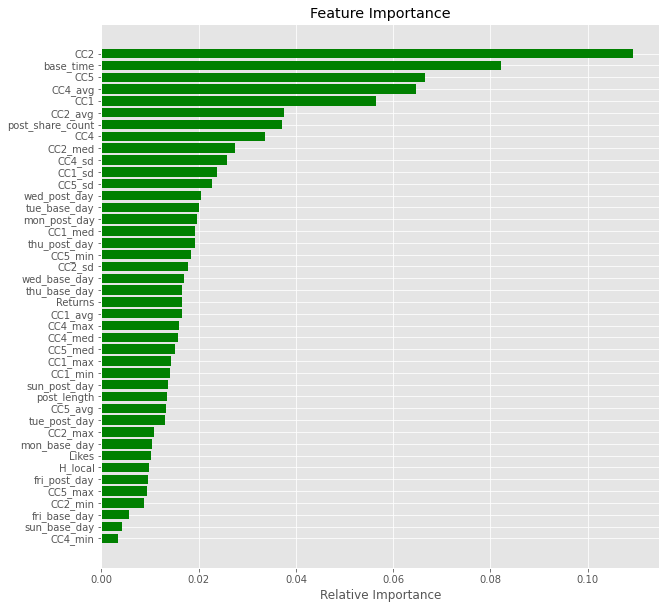

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###Most Important features is Base time and CC2 features and we have acheieved test score 0.73.

# **Conclusion**

---
* ### XGBoost performed best on our dataset with test adjusted R2 score of  0.73.
* ### Gradient Boosting and Random Forest also performed well compared other models.

* ### From feature importance plot of Random Forest, Gradient Boosting and XGBoosting we can conclude that most important features are CC2 (Comment count in last 24 hrs w.r.t to selected basetime)
Base Time/Date 

* ### Dataset was large, so unable to use grid-search to find the optimal hyperparameters. Model accuracy can be improved.
